# Diamond Price Analysis

## Giriş

Projenin hedefi, elmasların fiyatlarını tahmin etmek için veri bilimi ve analitik yöntemler kullanarak, elmasların çeşitli özelliklerine dayalı bir analiz yapmaktır.

## Importing Libraries

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None) 
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_csv("diamonds.csv")

In [7]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.shape

(53940, 11)

In [9]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### Pırlanta Veri Seti Veri Sözlüğü

Bu veri seti, 53,940 pırlanta hakkında bilgi içermektedir ve 11 özellikten oluşmaktadır. Aşağıda her bir sütunun tanımı yer almaktadır:

| Sütun Adı     | Veri Tipi | Açıklama                                                   |
|---------------|-----------|-----------------------------------------------------------|
| `Unnamed: 0`  | int64     | Her pırlanta kaydı için indeks veya tanımlayıcı           |
| `carat`       | float64   | Pırlantanın ağırlığı, karat cinsinden ölçülmektedir      |
| `cut`         | object    | Kesim kalitesi (örn. Ideal, Premium, Good)               |
| `color`       | object    | Pırlanta rengi, bir harfle temsil edilmektedir (örn. D, E, J) |
| `clarity`     | object    | Pırlantanın berraklık derecesi (örn. SI1, VS2)           |
| `depth`       | float64   | Pırlantanın toplam derinlik yüzdesi                       |
| `table`       | float64   | Pırlantanın masa yüzdesi                                   |
| `price`       | int64     | Pırlantanın ABD doları cinsinden fiyatı                   |
| `x`           | float64   | Pırlantanın uzunluğu, milimetre cinsinden                 |
| `y`           | float64   | Pırlantanın genişliği, milimetre cinsinden                |
| `z`           | float64   | Pırlantanın derinliği, milimetre cinsinden                |


In [12]:
df["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

### Berraklık Dereceleri Özeti

- **IF:** İçsel kusursuz; en yüksek berraklık.
- **VVS1:** Çok çok hafif dahil; zor görünür.
- **VVS2:** Biraz daha içerik; genel olarak temiz.
- **VS1:** Çok hafif dahil; zor görünür.
- **VS2:** VS1'e göre daha fazla içerik.
- **SI1:** Hafifçe dahil; zor görünür.
- **SI2:** Daha fazla içerik; düşük berraklık.
- **I1:** Gözle görülebilen büyük kusurlar; en düşük berraklık.

In [14]:
df["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

### Kesim Kalitesi Özeti

- **Ideal:** En yüksek kesim kalitesi, en iyi parlaklık ve estetik.
- **Premium:** Yüksek kesim kalitesi, oldukça parlak ve değerli.
- **Very Good:** İyi kesim kalitesi, tatmin edici parlaklık.
- **Good:** Orta düzey kesim kalitesi, tatmin edici parlaklık.
- **Fair:** En düşük kesim kalitesi, düşük parlaklık ve değer.

In [16]:
df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

### Renk Dereceleri Özeti

- **D:** Renksiz (Colorless); en yüksek renk kalitesi.
- **E:** Renksiz (Colorless); "D" derecesine yakın.
- **F:** Renksiz (Colorless); "D" ve "E" derecelerine yakın.
- **G:** Hafif Renkli (Near Colorless); çıplak gözle zor fark edilir.
- **H:** Hafif Renkli (Near Colorless); renk farkı algılanabilir.
- **I:** Hafif Renkli (Near Colorless); renk farkı belirgin.
- **J:** Hafif Renkli (Near Colorless); daha belirgin renk farkı.

In [18]:
dff= df.sort_values(by='price', ascending=False)

In [19]:
dff.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
27749,27750,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27748,27749,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27747,27748,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27746,27747,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27745,27746,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27744,27745,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
27742,27743,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84
27743,27744,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91
27740,27741,1.71,Premium,F,VS2,62.3,59.0,18791,7.57,7.53,4.70
27741,27742,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21


In [20]:
df['volume'] = df['x'] * df['y'] * df['z']

In [21]:
df = df.drop(columns=['x', 'y', 'z'])

In [22]:
cut_mapping = {
    'Ideal': 5,
    'Premium': 4,
    'Very Good': 3,
    'Good': 2,
    'Fair': 1
}
df['cut'] = df['cut'].map(cut_mapping)

In [23]:
color_mapping = {
    'D': 7,
    'E': 6,
    'F': 5,
    'G': 4,
    'H': 3,
    'I': 2,
    'J': 1
}
df['color'] = df['color'].map(color_mapping)

In [24]:
clarity_mapping = {
    'IF': 8,
    'VVS1': 7,
    'VVS2': 6,
    'VS1': 5,
    'VS2': 4,
    'SI1': 3,
    'SI2': 2,
    'I1': 1
}
df['clarity'] = df['clarity'].map(clarity_mapping)

In [25]:
df.sample(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,volume
17686,17687,1.06,4,4,5,62.0,58.0,7130,172.957680
30156,30157,0.30,5,6,3,61.4,56.0,720,50.406396
17965,17966,1.25,4,6,3,60.9,59.0,7260,208.738296


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = df.drop(columns=['Unnamed: 0'])

In [28]:
correlation_matrix = df.corr()

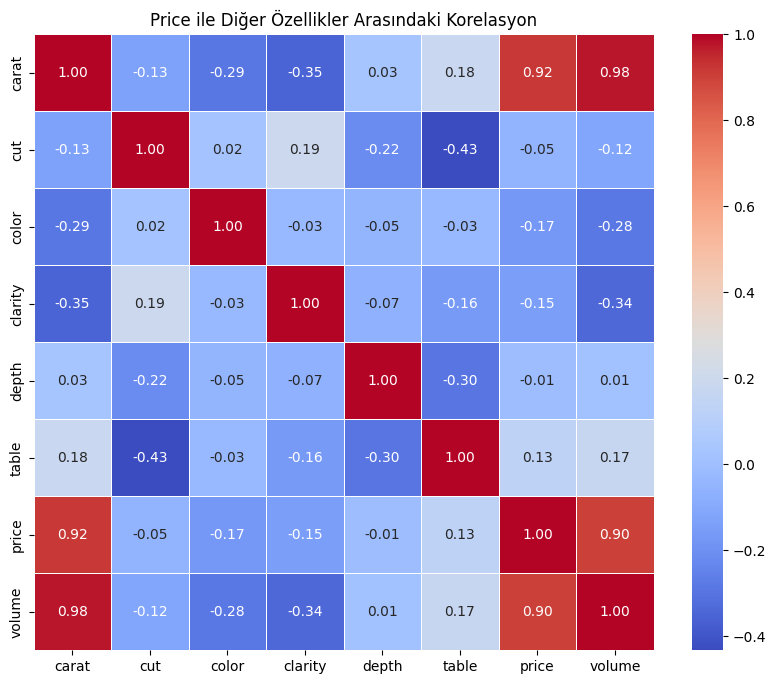

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Price ile Diğer Özellikler Arasındaki Korelasyon');

In [30]:
correlation_matrix = df.corr()
price_correlation = correlation_matrix['price']
price_correlation_sorted = price_correlation.sort_values(ascending=False)
print(price_correlation_sorted)

price      1.000000
carat      0.921591
volume     0.902385
table      0.127134
depth     -0.010647
cut       -0.053491
clarity   -0.146800
color     -0.172511
Name: price, dtype: float64


In [31]:
x = df.drop(columns=['price'])

In [32]:
y = df['price']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from math import sqrt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Model dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SGD Regressor': SGDRegressor(),
    'Extra Tree Regressor': ExtraTreeRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'RadiusNeighbors Regressor': RadiusNeighborsRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'XGB Regressor': XGBRegressor(),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor()
}

# Evaluation results
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    r_squared = r2_score(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    # Save the results
    results[name] = {
        'R-Squared': r_squared,
        'RMSE': rmse,
        'MAE': mae
    }

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


                                R-Squared          RMSE           MAE
Linear Regression            9.033338e-01  1.239631e+03  8.540894e+02
Ridge                        9.033416e-01  1.239581e+03  8.540004e+02
Lasso                        9.033761e-01  1.239360e+03  8.534817e+02
ElasticNet                   8.981451e-01  1.272466e+03  8.204076e+02
SGD Regressor               -9.671156e+17  3.920977e+12  3.584562e+12
Extra Tree Regressor         9.663727e-01  7.311414e+02  3.596990e+02
Gradient Boosting Regressor  9.763280e-01  6.134413e+02  3.395824e+02
KNeighbors Regressor         9.597000e-01  8.004011e+02  4.031928e+02
RadiusNeighbors Regressor   -2.512509e+30  6.319882e+18  4.330402e+18
AdaBoost Regressor           9.191220e-01  1.133888e+03  8.669717e+02
Decision Tree Regressor      9.687220e-01  7.051383e+02  3.499560e+02
XGB Regressor                9.810282e-01  5.491729e+02  2.780178e+02
SVR                          6.985746e-01  2.188997e+03  1.065378e+03
MLP Regressor       

In [36]:
import joblib

# En iyi modeli seçin
best_model = models['XGB Regressor']

# Modeli kaydedin
joblib.dump(best_model, 'xgb_regressor_model.pkl')

['xgb_regressor_model.pkl']

## Sonuç

Model performansına bakıldığında, XGB Regressor (R-Squared = 0.981, RMSE = 549.17, MAE = 278.02), fiyat tahmini konusunda en güçlü model olarak öne çıkmaktadır.